In [ ]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_path = Path("../data/processed/train_cleaned.csv").resolve()
test_path = Path("../data/processed/test_cleaned.csv").resolve()

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

CabinDeck is included as a candidate feature because deck location may encode passenger location/class information that could relate to survival.

In [ ]:
def create_cabindeck_feat(df):
    df = df.copy()
    df["CabinDeck"] = (
        df["Cabin"]
        .str.extract(r"([A-Za-z])", expand=False)
        .str.upper()
        .fillna("Unknown")
    )
    return df

In [ ]:
train_df = create_cabindeck_feat(train_df)
test_df = create_cabindeck_feat(test_df)

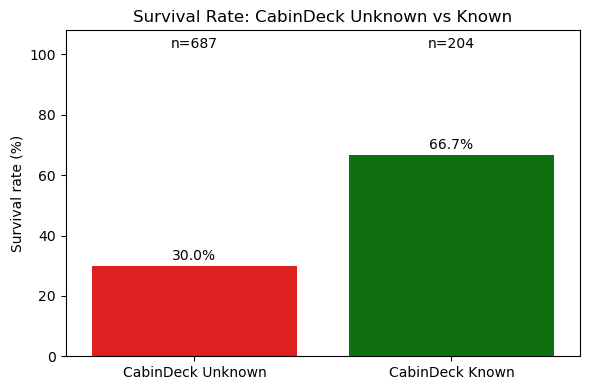

In [ ]:
plot_data = train_df.copy()
plot_data["DeckKnown"] = plot_data["CabinDeck"].notna() & (plot_data["CabinDeck"] != "Unknown")

rate = (
    plot_data.groupby("DeckKnown")["Survived"]
    .mean()
    .rename(index={False: "CabinDeck Unknown", True: "CabinDeck Known"})
    * 100
)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=rate.index, y=rate.values, hue=rate.index, palette=["red", "green"], legend=False)
ax.set_ylabel("Survival rate (%)")
ax.set_xlabel("")
ax.set_title("Survival Rate: CabinDeck Unknown vs Known")
ax.set_ylim(0, 108)

counts = (
    plot_data["DeckKnown"]
    .map({False: "CabinDeck Unknown", True: "CabinDeck Known"})
    .value_counts()
    .reindex(rate.index)
)

for i, n in enumerate(counts):
    ax.text(i, 101, f"n={int(n)}", ha="center", va="bottom", fontsize=10)

for i, v in enumerate(rate.values):
    ax.text(i, v + 1, f"{v:.1f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()


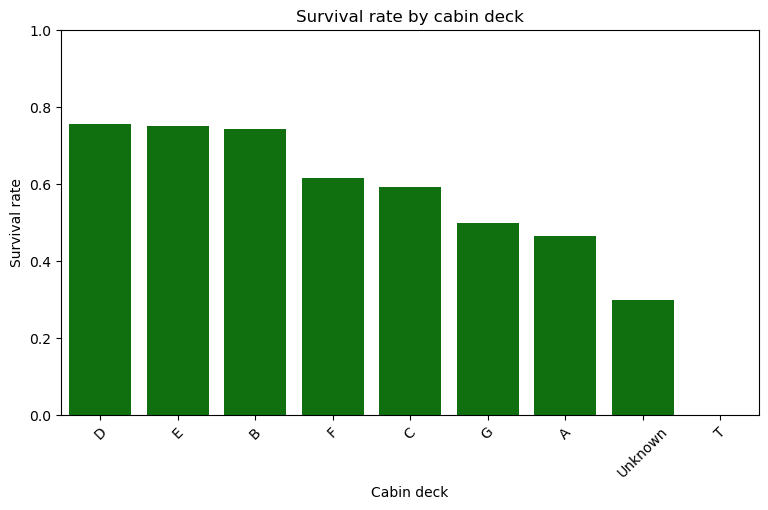

In [ ]:
rate = (train_df.groupby('CabinDeck')['Survived']
          .agg(['mean', 'count'])
          .rename(columns={'mean': 'survival_rate', 'count': 'n'})
          .sort_values('survival_rate', ascending=False))

plt.figure(figsize=(9,5))
ax = sns.barplot(x=rate.index, y=rate['survival_rate'], color='green')
ax.set_ylim(0, 1)
ax.set_ylabel('Survival rate')
ax.set_xlabel('Cabin deck')
ax.set_title('Survival rate by cabin deck')
plt.xticks(rotation=45)
plt.show()

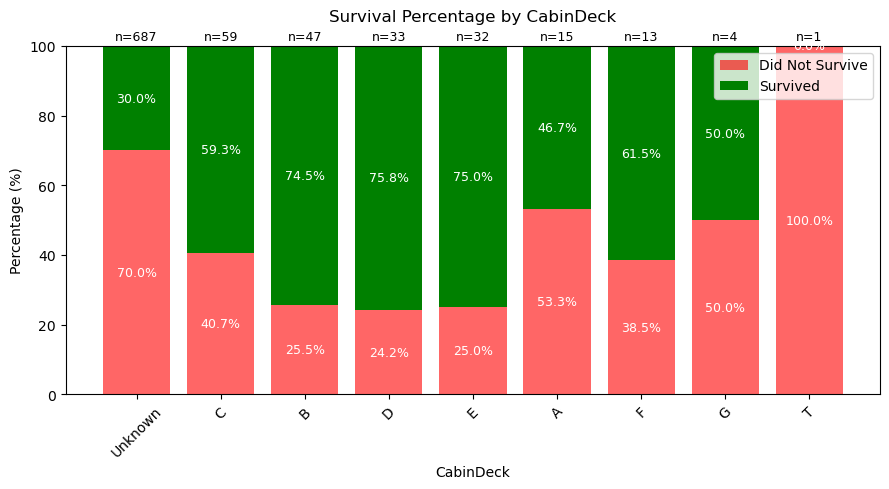

In [ ]:
import matplotlib.pyplot as plt

plot_data = train_df.copy()

# Sort decks by total passenger count (descending)
total_counts = plot_data["CabinDeck"].value_counts()
survived_counts = plot_data.groupby("CabinDeck")["Survived"].sum().reindex(total_counts.index)

# Percentages
survived_percent = (survived_counts / total_counts) * 100
not_survived_percent = 100 - survived_percent

plt.figure(figsize=(9, 5))

# Did not survive (red)
plt.bar(
    total_counts.index,
    not_survived_percent,
    label="Did Not Survive",
    color="red",
    alpha=0.6
)

# Survived (green) stacked on top
plt.bar(
    total_counts.index,
    survived_percent,
    bottom=not_survived_percent,
    label="Survived",
    color="green"
)

# Percentage labels inside each stacked segment
for i, deck in enumerate(total_counts.index):
    plt.text(
        i,
        not_survived_percent.iloc[i] / 2,
        f"{not_survived_percent.iloc[i]:.1f}%",
        ha="center",
        va="center",
        color="white",
        fontsize=9
    )
    plt.text(
        i,
        not_survived_percent.iloc[i] + survived_percent.iloc[i] / 2,
        f"{survived_percent.iloc[i]:.1f}%",
        ha="center",
        va="center",
        color="white",
        fontsize=9
    )
    plt.text(i, 101.0, f"n={int(total_counts.iloc[i])}",
             ha="center", va="bottom", color="black", fontsize=9)

plt.ylabel("Percentage (%)")
plt.xlabel("CabinDeck")
plt.title("Survival Percentage by CabinDeck", pad=18)
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
